In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

In [2]:
torch.manual_seed(42)

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
# train_dataset = datasets.FashionMNIST(
#     root="./data",
#     train=True,
#     download=True,
#     transform=transform
# )

# test_dataset = datasets.FashionMNIST(
#     root="./data",
#     train=False,
#     download=True,
#     transform=transform
# )

In [5]:
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [6]:
df=pd.read_csv("data/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


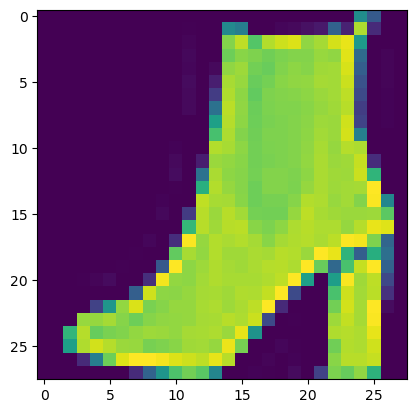

In [14]:
plt.imshow(df.iloc[0:1,1:].values.reshape(28,28))

In [16]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
# features->float32  labels->long
class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features=torch.tensor(features,dtype=torch.float32)
        self.labels=torch.tensor(labels,dtype=torch.long)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self,idx):
        return self.features[idx],self.labels[idx]

In [ ]:
train_dataset= CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)

In [23]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [25]:
# testing shuffle off to compute better accuracy
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [26]:
class MyNN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            # dont define softmax as it is inbuilt in the BCE loss
            nn.Linear(64,10)
        )
    
    def forward(self,x):
        return self.model(x)

In [47]:
epochs=200
lr=0.1

In [48]:
model=MyNN(X_train.shape[1])

criterion=nn.CrossEntropyLoss()

optimizer=optim.SGD(model.parameters(),lr)

In [49]:
for epoch in range(epochs):

    epochLoss=0

    for batch_features, batch_labels in train_loader:

        # forward pass
        outputs=model(batch_features)

        # loss
        loss=criterion(outputs,batch_labels)

        # back pass
        optimizer.zero_grad()
        loss.backward()

        # update grads
        optimizer.step()

        epochLoss+=loss.item()
    
    if((epoch+1)%10==0):
        avgLoss= epochLoss/len(train_loader)
        print(f'Epoch: {epoch+1}, Loss:{avgLoss}')

Epoch: 10, Loss:0.41699952046076455
Epoch: 20, Loss:0.27210831706722577
Epoch: 30, Loss:0.18952601277579864
Epoch: 40, Loss:0.1786599239334464
Epoch: 50, Loss:0.09283883429753284
Epoch: 60, Loss:0.06942436767276376
Epoch: 70, Loss:0.06400089593759427
Epoch: 80, Loss:0.034552478453454875
Epoch: 90, Loss:0.027120505447577065
Epoch: 100, Loss:0.003068260185342903
Epoch: 110, Loss:0.001386337591393385
Epoch: 120, Loss:0.0009777611940565596
Epoch: 130, Loss:0.0007806049009377602
Epoch: 140, Loss:0.0006480680682094923
Epoch: 150, Loss:0.000554095546734364
Epoch: 160, Loss:0.0004781300325218278
Epoch: 170, Loss:0.00042937537816518066
Epoch: 180, Loss:0.0003872914082724795
Epoch: 190, Loss:0.00034803287698499235
Epoch: 200, Loss:0.0003175312745346067


In [50]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [51]:
total=0
correct=0

with torch.no_grad():

    for batch_features, batch_labels in test_loader:
        # batch size=32, every input gives 10 len tensor with probabilities
        # so we get (32,10) len tensor
        pred=model(batch_features)
        _, predicted= torch.max(pred,1)

        total=total+batch_labels.shape[0]
        correct=correct+(predicted==batch_labels).sum().item()

print(f'Accuracy: {correct/total}')

Accuracy: 0.835
